# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib notebook
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [6]:
#no need to use built-in python functions to explore measures of centrality
#using pandas method .describe() instead to give a clearer view of data statistics
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [14]:
%matplotlib notebook

<IPython.core.display.Javascript object>


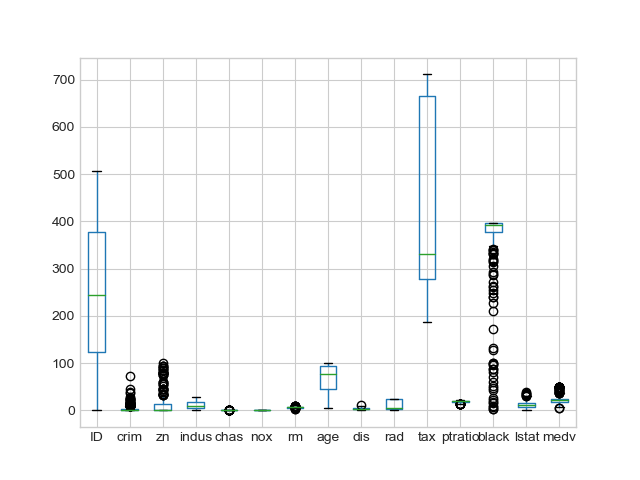

In [23]:
df.plot.box()

<IPython.core.display.Javascript object>


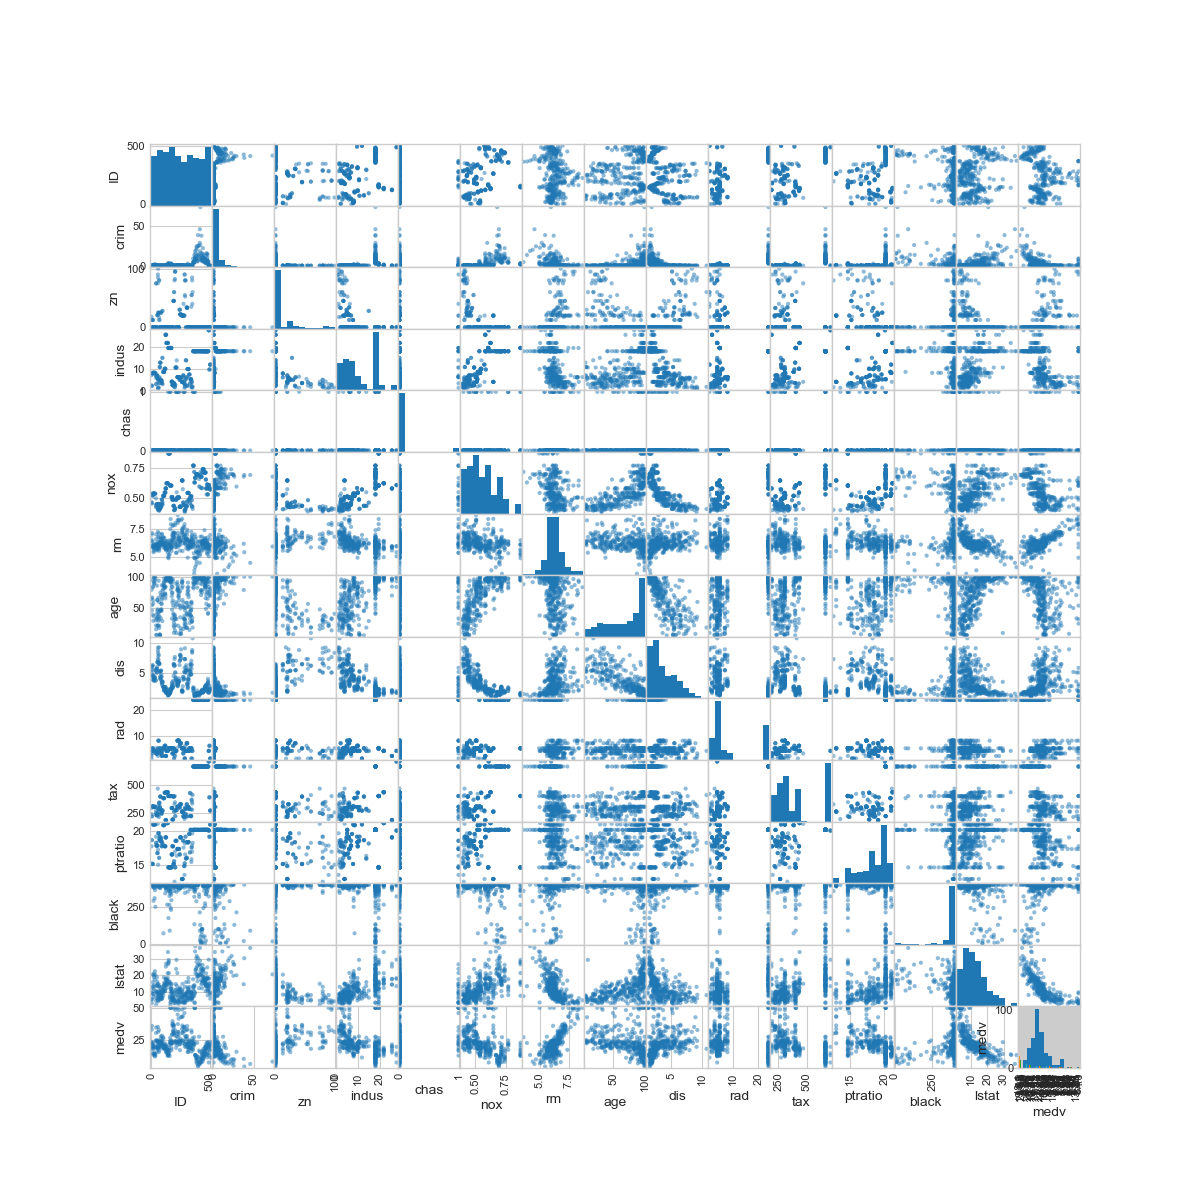

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CACE7A1940>,
      dtype=object)

In [24]:
#Looking for correlations with scatter matrix
#Negative correlation between age and distance: Older houses are closer to work locations
#Age and distance also correlated with nox: Older houses tend to have higher nox values
#Strong negative correlation between lstat and medv: less poor people in town = higher house prices
#Number of rooms positively correlated with the medv, negatively correlated with lstat
#Crime rates are mostly very low in the dataset, except for one extreme case, which is the sector of towns with the mode of idus
#The town IDs that fall into the mode of the indus column have the highest crime rates
pd.plotting.scatter_matrix(df, figsize=(12,12))

In [37]:
df.medv

0      24.0
1      21.6
2      33.4
3      36.2
4      22.9
5      15.0
6      18.9
7      21.7
8      20.4
9      18.2
10     19.9
11     23.1
12     20.2
13     13.6
14     19.6
15     15.2
16     14.5
17     14.8
18     12.7
19     14.5
20     13.5
21     24.7
22     30.8
23     34.9
24     25.3
25     24.7
26     21.2
27     19.3
28     20.0
29     16.6
       ... 
303    21.4
304    19.9
305    19.0
306    19.1
307    19.1
308    20.1
309    19.6
310    23.2
311    13.8
312    16.7
313    12.0
314    14.6
315    21.4
316    23.0
317    23.7
318    21.8
319    20.6
320    19.1
321    20.6
322    15.2
323     8.1
324    13.6
325    20.1
326    21.8
327    18.3
328    17.5
329    22.4
330    20.6
331    23.9
332    11.9
Name: medv, Length: 333, dtype: float64

<IPython.core.display.Javascript object>


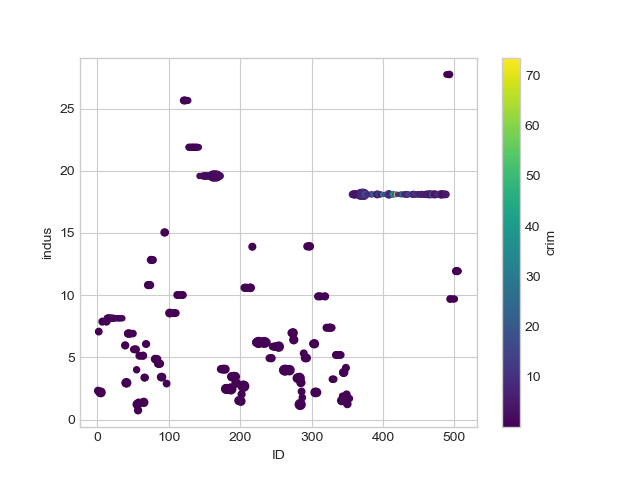

In [39]:
#This plot shows the band of town IDs which fall in the same indus bin, have low property values, and higher crime rates
df.plot.scatter('ID','indus',c='crim',s=df['medv'],colormap='viridis')

<IPython.core.display.Javascript object>


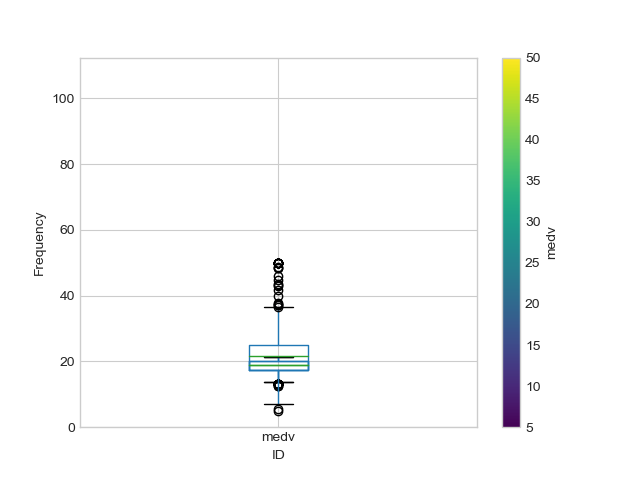

In [43]:
df2 = df[df.ID>350]
df2.plot.scatter('ID','crim',c='medv',s=df2['rm'],colormap='viridis')

0    18.1
dtype: float64


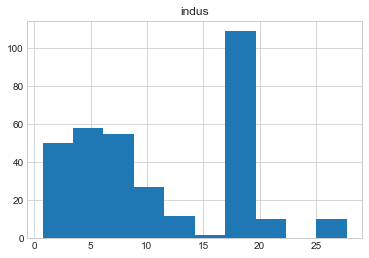

In [63]:
#The mode of the indus column is at 18.1, these towns tend to have higher ID numbers, and more black people
df.hist(column="indus")
print(df.indus.mode())

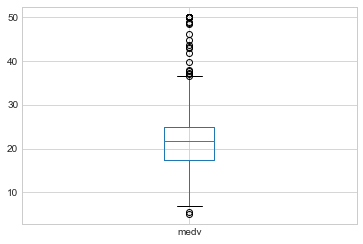

In [105]:
df.medv.plot(kind='box')

In [71]:
import numpy as np
for n, feat1 in enumerate(df.columns):
    for feat2 in df.columns[n+1:]:
        r2 = np.corrcoef(df[feat1],df[feat2])[0][1]
        if r2>.7:
            print(f'{feat1} and {feat2} have a correlation coefficient of {r2}')

ID and rad have a correlation coefficient of 0.7075262711727565
indus and nox have a correlation coefficient of 0.7500874390908759
indus and tax have a correlation coefficient of 0.7083132697607584
nox and age have a correlation coefficient of 0.7359995828422857
rad and tax have a correlation coefficient of 0.9035618963206118


In [90]:
df.rm.nunique()

308

333
308
308
6


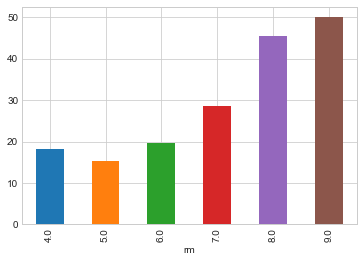

In [103]:
#Showing that the median value of a house increases with the number of rooms:

print(len(df))
print(df.rm.nunique())
df3 = df.groupby('rm').medv.mean()
print(len(df3))
df4 = df3.reset_index().round({'rm':0}).groupby('rm').medv.mean()
print(len(df4))
df4.plot.bar()

In [18]:
#396.90 is the value which indicates that there is zero proportion of blacks in town
#This is also the value which is the most frequent by far, meaning the data is mostly non-black towns
df.black.value_counts(ascending=False)

396.90    79
395.24     3
393.37     2
395.11     2
388.45     2
395.60     2
393.23     2
396.21     2
395.56     2
395.62     2
395.63     2
395.58     2
392.80     2
394.72     2
377.07     2
374.71     2
389.71     2
393.68     2
395.99     1
390.74     1
374.56     1
388.52     1
393.24     1
376.73     1
394.08     1
355.29     1
348.13     1
395.15     1
393.87     1
392.52     1
          ..
372.08     1
376.70     1
378.35     1
350.45     1
390.30     1
390.94     1
393.07     1
368.74     1
394.47     1
390.49     1
81.33      1
334.40     1
387.89     1
379.38     1
392.40     1
248.31     1
288.99     1
363.02     1
255.23     1
354.31     1
43.06      1
394.76     1
395.93     1
316.03     1
391.25     1
131.42     1
384.07     1
393.30     1
389.39     1
390.50     1
Name: black, Length: 237, dtype: int64

In [10]:
#Noticed that 'rad' has fewer unique values, may be good for checking correlation with other vars
df.rad.value_counts()

24    88
5     76
4     70
3     27
8     18
2     14
1     14
7     13
6     13
Name: rad, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!